## Most Important Attributes of a Candy : Machine Learning I Project using Candy dataset

## Introduction
 Data Science / Analytics is all about finding valuable insights from the given dataset. In short, finding answers that could help business. In this notebook, we will see how to get started with Data Analysis using Python. The Python packages that we use in this notebook are: numpy, pandas, matplotlib, and seaborn.

## Data source and dataset : 
This analysis we will be focusing on deriving the most important attributes of a candy. We'll be utilizing a statistical method called Regression to derive the key factors of a successful candy!
Source: https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/candy-data.csv



## Problem Statement - "What do people look for in candy and what makes candies win?" 
- Predict winpercent of candies based on the available dataset
- Use a machine learning algorithm like Linear Regression to fit a model that can predict the winning percentage.

## Preliminary Steps in Exploratory Data Analysis :

**Import Libraries.**

In [0]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
import warnings
from IPython.display import display


**Notebook Settings to ignore warning.**

In [0]:
# Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') # ignore warnings.
%config IPCompleter.greedy = True # autocomplete feature.
pd.options.display.max_rows = None # set maximum rows that can be displayed in notebook.
pd.options.display.max_columns = None # set maximum columns that can be displayed in notebook.
pd.options.display.precision = 2 # set the precision of floating point numbers.

**Read Data.**

In [126]:
df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/candy-data.csv', encoding='utf-8')
df.drop_duplicates(inplace=True) # drop duplicates if any.

#The very basic information to know is the dimension of the dataset — num rows x num columns.
df.shape

(85, 13)

In [127]:
#And then, It’s important to know the different types of data/variables in the given dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 9.3+ KB


In [128]:
# Display the data type for each variable
df.dtypes                                                         

competitorname       object
chocolate             int64
fruity                int64
caramel               int64
peanutyalmondy        int64
nougat                int64
crispedricewafer      int64
hard                  int64
bar                   int64
pluribus              int64
sugarpercent        float64
pricepercent        float64
winpercent          float64
dtype: object

## Data Preparation.

**Check for missing values.**

In [129]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

winpercent          0.0
pricepercent        0.0
sugarpercent        0.0
pluribus            0.0
bar                 0.0
hard                0.0
crispedricewafer    0.0
nougat              0.0
peanutyalmondy      0.0
caramel             0.0
fruity              0.0
chocolate           0.0
competitorname      0.0
dtype: float64

No missing values.

In [130]:
# Display the first five rows of the data set
df.head()              

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.73,0.86,66.97
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.60,0.51,67.60
2,One dime,0,0,0,0,0,0,0,0,0,0.01,0.12,32.26
3,One quarter,0,0,0,0,0,0,0,0,0,0.01,0.51,46.12
4,Air Heads,0,1,0,0,0,0,0,0,0,0.91,0.51,52.34


We have a total of 12 variables that describe a chocolate. 9 of them are categorical and the rest, i.e. 3 are numerical variables.

1. chocolate: Does it contain chocolate?
2. fruity: Is it fruit flavored?
3. caramel: Is there caramel in the candy?
4. peanutalmondy: Does it contain peanuts, peanut butter or almonds?
5. nougat: Does it contain nougat?
6. crispedricewafer: Does it contain crisped rice, wafers, or a cookie component?
7. hard: Is it a hard candy?
8. bar: Is it a candy bar?
9. pluribus: Is it one of many candies in a bag or box?
10. sugarpercent: The percentile of sugar it falls under within the data set.
11. pricepercent: The unit price percentile compared to the rest of the set.
12. winpercent: The overall win percentage according to 269,000 matchups.

### Features and target 
  - There are 3 continuous variables : sugarpercent,pricepercent and winpercent
  - There are 9 categorical variables : chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,	pluribus
  - competitorname - categorical text variable
  - The target variable to predict is **winpercent**.

In [131]:
# Descriptive statistics for the numerical variables
df.describe()                              

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00
mean,0.44,0.45,0.16,0.16,0.08,0.08,0.18,0.25,0.52,0.48,0.47,50.32
std,0.50,0.50,0.37,0.37,0.28,0.28,0.38,0.43,0.50,0.28,0.29,14.71
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,22.45
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.26,39.14
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.47,0.47,47.83
75%,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.73,0.65,59.86
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.98,84.18


In [0]:
df['winpercent'] = df['winpercent']/100

**Deriving new features.**

In [0]:
df['sugarbyprice'] = df['sugarpercent'].div(df['pricepercent']) # higher value means the candy is sweet as well as cheap.
df['winbyprice'] = df['winpercent'].div(df['pricepercent']) # higher value means the candy is more liked as well as cheap.

In [0]:
categorival_vars = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar',
                    'pluribus']
numerical_vars = ['sugarpercent', 'pricepercent', 'winpercent', 'sugarbyprice', 'winbyprice']

<hr>

## Data Understanding:

### **Some Questions one might ask:**

__1. Top 10 winner candies.__

In [135]:
df['competitorname'] = df['competitorname'].str.replace('Õ', "'") # Special character was appearing in name of candy.
df.sort_values(by=['winpercent', 'sugarpercent'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
52,Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.72,0.65,0.84,1.11,1.29
51,Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.03,0.28,0.82,0.12,2.93
79,Twix,1,0,1,0,0,1,0,1,0,0.55,0.91,0.82,0.60,0.90
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.31,0.51,0.77,0.61,1.50
64,Snickers,1,0,1,1,1,0,0,1,0,0.55,0.65,0.77,0.84,1.18
53,Reese's pieces,1,0,0,1,0,0,0,0,1,0.41,0.65,0.73,0.62,1.13
36,Milky Way,1,0,1,0,1,0,0,1,0,0.60,0.65,0.73,0.93,1.12
54,Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.99,0.65,0.73,1.52,1.12
32,Peanut butter M&M's,1,0,0,1,0,0,0,0,1,0.82,0.65,0.71,1.27,1.10
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.60,0.77,0.71,0.79,0.92


__Reese's__ seem to be a favourite. Note that all the top competitors are __chocolaty__ as well. 
Also, __Reese's Miniatures__ is very __cheap__ when compared to top competitors and overall as well.

__2. Competitors which are not chocolaty but winners.__

In [136]:
df[df['chocolate']==0].sort_values(by=['winpercent', 'sugarpercent'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
68,Starburst,0,1,0,0,0,0,0,0,1,0.15,0.22,0.67,0.69,3.05
60,Skittles original,0,1,0,0,0,0,0,0,1,0.94,0.22,0.63,4.28,2.87
66,Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.07,0.12,0.60,0.59,5.16
18,Haribo Gold Bears,0,1,0,0,0,0,0,0,1,0.47,0.47,0.57,1.00,1.23
41,Nerds,0,1,0,0,0,0,1,0,1,0.85,0.32,0.55,2.61,1.70
61,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.94,0.22,0.55,4.28,2.50
73,Swedish Fish,0,1,0,0,0,0,0,0,1,0.60,0.76,0.55,0.80,0.73
31,Lifesavers big ring gummies,0,1,0,0,0,0,0,0,0,0.27,0.28,0.53,0.96,1.90
67,Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.07,0.12,0.53,0.59,4.55
4,Air Heads,0,1,0,0,0,0,0,0,0,0.91,0.51,0.52,1.77,1.02


__Sour Patch Kids__ has a high __`winbyprice`__. They are __cheap__ as well as a __favourite__.

__3. Top `winbyprice` competitors.__

In [137]:
df.sort_values(by=['winbyprice', 'winpercent'], ascending=False).head(10)
   

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
76,Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.17,0.01,0.46,15.82,41.58
48,Pixie Sticks,0,0,0,0,0,0,0,0,1,0.09,0.02,0.38,4.04,16.40
15,Fruit Chews,0,1,0,0,0,0,0,0,1,0.13,0.03,0.43,3.74,12.67
14,Dum Dums,0,1,0,0,0,0,1,0,0,0.73,0.03,0.39,21.53,11.61
69,Strawberry bon bons,0,1,0,0,0,0,1,0,1,0.57,0.06,0.35,9.81,5.96
22,Hershey's Kisses,1,0,0,0,0,0,0,0,1,0.13,0.09,0.55,1.37,5.95
66,Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.07,0.12,0.60,0.59,5.16
67,Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.07,0.12,0.53,0.59,4.55
57,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.73,0.07,0.30,10.61,4.30
59,Sixlets,1,0,0,0,0,0,0,0,1,0.22,0.08,0.35,2.72,4.29


__Tootsie Roll Midgies__ seems to give value for money with respect to pricepercent.

__4. Top 10 sugary candies.__

In [138]:
df.sort_values(by=['sugarpercent', 'winpercent'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
54,Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.99,0.65,0.73,1.52,1.12
38,Milky Way Simply Caramel,1,0,1,0,0,0,0,1,0,0.96,0.86,0.64,1.12,0.75
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.96,0.77,0.33,1.26,0.44
60,Skittles original,0,1,0,0,0,0,0,0,1,0.94,0.22,0.63,4.28,2.87
61,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.94,0.22,0.55,4.28,2.50
4,Air Heads,0,1,0,0,0,0,0,0,0,0.91,0.51,0.52,1.77,1.02
17,Gobstopper,0,1,0,0,0,0,1,0,1,0.91,0.45,0.47,2.00,1.03
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.91,0.32,0.38,2.79,1.17
84,Whoppers,1,0,0,0,0,1,0,0,1,0.87,0.85,0.50,1.03,0.58
34,Mike & Ike,0,1,0,0,0,0,0,0,1,0.87,0.32,0.46,2.68,1.43


 __5. Which candies are both chocolaty as well as fruity?__
 

In [139]:
df[(df['chocolate']==1)&(df['fruity']==1)]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
74,Tootsie Pop,1,1,0,0,0,0,1,0,0,0.6,0.32,0.49,1.86,1.51


## **Correlation Heatmap**

Text(0.5, 1.0, 'Correlation between features')

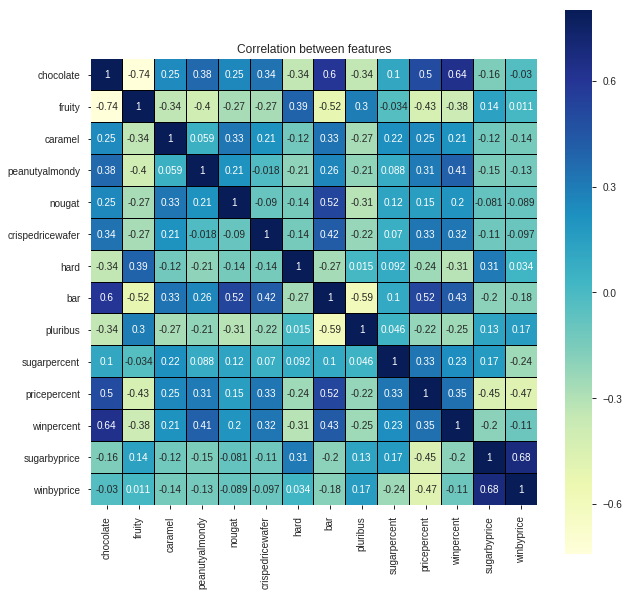

In [140]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

 ### Observations: 
    The above heatmap illustrates the points mentioned below: 
        - The chocolate flavoured and bar type have higher correlation with winpercent
        - The chocolate flavoured is most likely bar.
        - The chocolate bar has higher pricepercent
        - High negative corelation : if it is chocolate bar the chance of it being hard is unlikely.
        - The caramel does not make much difference to winpercent
        - The peanutyalmondy has poitive correlation with winpercent.
        - The hard candies have -ve correlation wrt winpercent.
        - The price percent has positive correlation with winpercent.
        - If it's a chocolate or bar , its not fruity
        - If it's fruity flavoured, winpercent and price goes down      
        - The candies like pluribus does not make difference to winpercent

There are no features with 0 and null values . No Pre-processing required.

## Predicting the win percentage.

In [141]:
#load dataset without derived columns
candy = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/candy-data.csv')
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.73,0.86,66.97
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.60,0.51,67.60
2,One dime,0,0,0,0,0,0,0,0,0,0.01,0.12,32.26
3,One quarter,0,0,0,0,0,0,0,0,0,0.01,0.51,46.12
4,Air Heads,0,1,0,0,0,0,0,0,0,0.91,0.51,52.34


In [0]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(candy)
profile.to_file(outputfile="candy_profile.html")

In [144]:
# Output variable y
y = candy['winpercent']
y.head()

0    66.97
1    67.60
2    32.26
3    46.12
4    52.34
Name: winpercent, dtype: float64

In [145]:
candy.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00
mean,0.44,0.45,0.16,0.16,0.08,0.08,0.18,0.25,0.52,0.48,0.47,50.32
std,0.50,0.50,0.37,0.37,0.28,0.28,0.38,0.43,0.50,0.28,0.29,14.71
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,22.45
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.26,39.14
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.47,0.47,47.83
75%,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.73,0.65,59.86
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.98,84.18


In [0]:
from sklearn import metrics
def lin_reg(X,y):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
    print('Train cases as below')
    print('X_train shape: ',X_train.shape)
    print('y_train shape: ',y_train.shape)
    print('\nTest cases as below')
    print('X_test shape: ',X_test.shape)
    print('y_test shape: ',y_test.shape)  
    print('\n')

    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    linreg.fit(X_train, y_train) 
    y_pred_test = linreg.predict(X_test) 
    y_pred_train = linreg.predict(X_train) 
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('RMSE for training set is {}'.format(RMSE_train))
    print('RMSE for test set is {}'.format(RMSE_test))
    print('\n')
    from sklearn.metrics import r2_score
    R2_test = r2_score(y_test, y_pred_test)
    R2_train = r2_score(y_train, y_pred_train)
    print('R-Square for training set is {}'.format(R2_train))
    print('R-Square  for test set is {}'.format(R2_test))
    print('\n')
    adjusted_r_squared = 1 - (1-R2_test)*(len(y)-1)/(len(y)-X.shape[1]-1)
    t_adjusted_r_squared = 1 - (1-R2_train)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print('Adjusted R-Square for test set is {}'.format(adjusted_r_squared))
    print('Adjusted R-Square  for training set is {}'.format(t_adjusted_r_squared))
    print('\n')

    print('Intercept:',linreg.intercept_)          # print the intercept 
    print('Coefficients:',linreg.coef_)  
    print('\n')

    fcols = X.columns.tolist()
    fcols.insert(0,'Intercept')
    coef = linreg.coef_.tolist()            
    coef.insert(0, linreg.intercept_)  

    eq1 = zip(fcols, coef)

    for c1,c2 in eq1:
        print(c1,c2)

**Run Linear Regression**

In [147]:
# Ignoring 'competitorname', fruity','nougat','pluribus','sugarpercent','crispedricewafer'
X = candy.drop(['winpercent','competitorname','fruity','nougat','pluribus','sugarpercent','crispedricewafer'],axis=1)
X.head()


,chocolate,caramel,peanutyalmondy,hard,bar,pricepercent
0,1,1,0,0,1,0.86
1,1,0,0,0,1,0.51
2,0,0,0,0,0,0.12
3,0,0,0,0,0,0.51
4,0,0,0,0,0,0.51


In [148]:
y.head()

0    66.97
1    67.60
2    32.26
3    46.12
4    52.34
Name: winpercent, dtype: float64

**Run Linear regression**

In [149]:
lin_reg(X,y)

Train cases as below
X_train shape:  (72, 6)
y_train shape:  (72,)

Test cases as below
X_test shape:  (13, 6)
y_test shape:  (13,)


RMSE for training set is 11.113762215540678
RMSE for test set is 9.86981466122024


R-Square for training set is 0.4209937243192907
R-Square  for test set is 0.5465405090456459


Adjusted R-Square for test set is 0.5116590097414648
Adjusted R-Square  for training set is 0.3764547800361593


Intercept: 42.38022622569661
Coefficients: [13.48724176 -0.49624696  7.92216801 -3.30679664  1.76955     2.0825304 ]


Intercept 42.38022622569661
chocolate 13.48724175953366
caramel -0.49624695939802077
peanutyalmondy 7.92216801455289
hard -3.3067966358154184
bar 1.7695499998099526
pricepercent 2.082530397388343


* Adjusted R-square explains **51% of variance**
* Candies which contains **chocolate** has a **coeffient of 13.48**  which is highest; compared to candies with no chocolate . **In Chocolate flavoured candies, chocolate clearly wins.**
* Candies which contains **peanutyalmondy** has a **coeffient of 7.92** which is highest; compared to candies with no peanutyalmondy.  In peanutyalmondy falvoured and non-chocolate candies , **peanutyalmondy clearly wins**.
* The candies with Caramel,Hard reduces winpercent little bit.
* The other columns like Bar, priceprecent does have mild impact on winpercent.

In [150]:
# Check for chocolate peanutyalmondy
X = candy.drop(['winpercent','fruity','competitorname','nougat','pluribus','sugarpercent','caramel','pricepercent','hard','bar','crispedricewafer'],axis=1)
X.head()


,chocolate,peanutyalmondy
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [151]:
lin_reg(X,y)


Train cases as below
X_train shape:  (72, 2)
y_train shape:  (72,)

Test cases as below
X_test shape:  (13, 2)
y_test shape:  (13,)


RMSE for training set is 11.221208285009476
RMSE for test set is 9.57739874204914


R-Square for training set is 0.40974412677090355
R-Square  for test set is 0.5730120298969794


Adjusted R-Square for test set is 0.5625976891627593
Adjusted R-Square  for training set is 0.39534764205799877


Intercept: 42.138983361111116
Coefficients: [15.55127107  8.55149692]


Intercept 42.138983361111116
chocolate 15.551271066666668
peanutyalmondy 8.551496916666665


* **Adjusted R-square** explains **56% of variance**
* Candies which contains **chocolate contibutes to winpercent upto 15.55 points** of winpercent compared to candies with no chocolate
* Candies which contains **peanutyalmondy contibutes to winpercent upto 8.55 points** of winpercent compared to candies with no peanutyalmondy

__Distribution of Features with derived columns__

In [152]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
0,100 Grand,1,0,1,0,0,1,0,1,0,0.73,0.86,0.67,0.85,0.78
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.60,0.51,0.68,1.18,1.32
2,One dime,0,0,0,0,0,0,0,0,0,0.01,0.12,0.32,0.09,2.78
3,One quarter,0,0,0,0,0,0,0,0,0,0.01,0.51,0.46,0.02,0.90
4,Air Heads,0,1,0,0,0,0,0,0,0,0.91,0.51,0.52,1.77,1.02


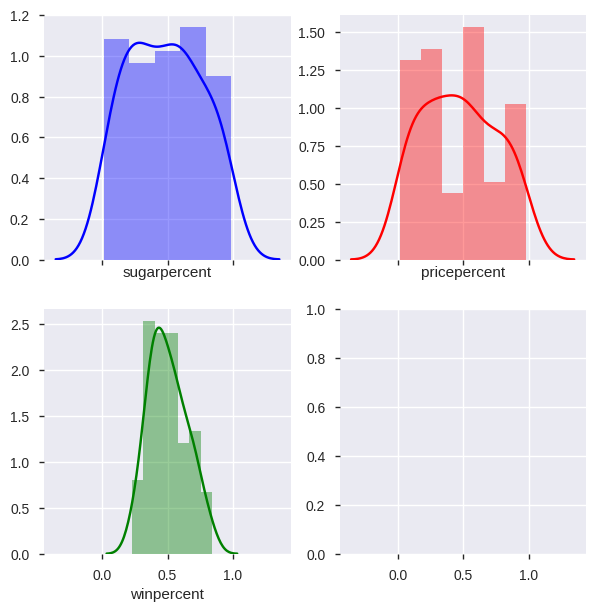

In [153]:
# Set up the matplotlib figure

f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)                       
sns.despine(left=True)

sns.distplot(df.sugarpercent, color="b", ax=axes[0, 0])

sns.distplot(df.pricepercent, color="r", ax=axes[0, 1])

sns.distplot(df.winpercent, color="g", ax=axes[1, 0])




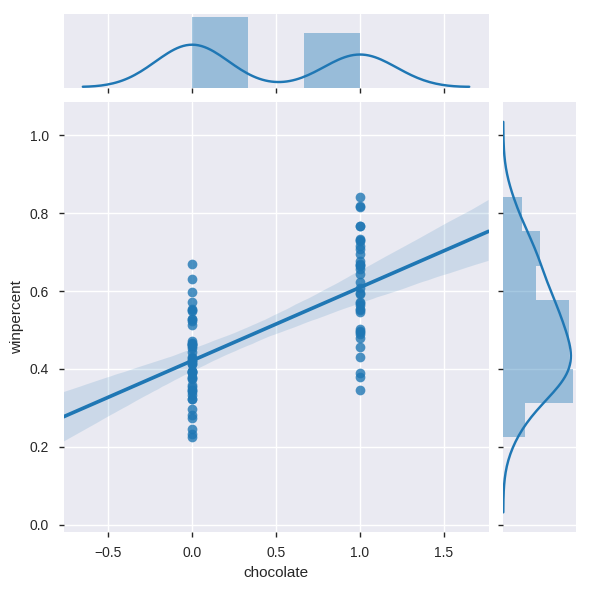

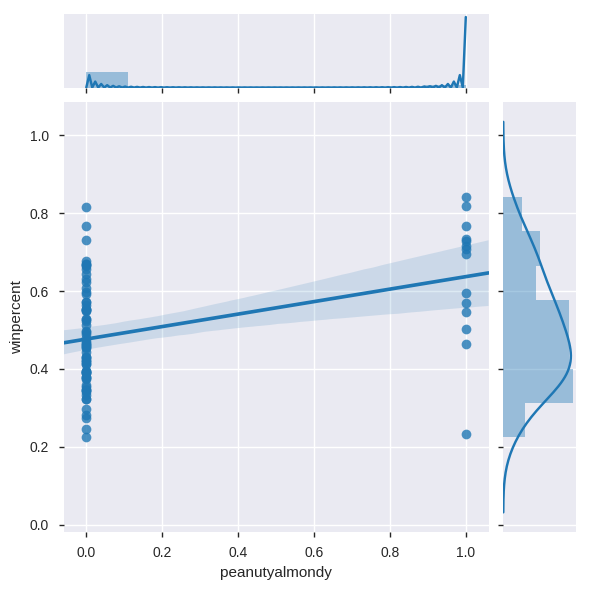

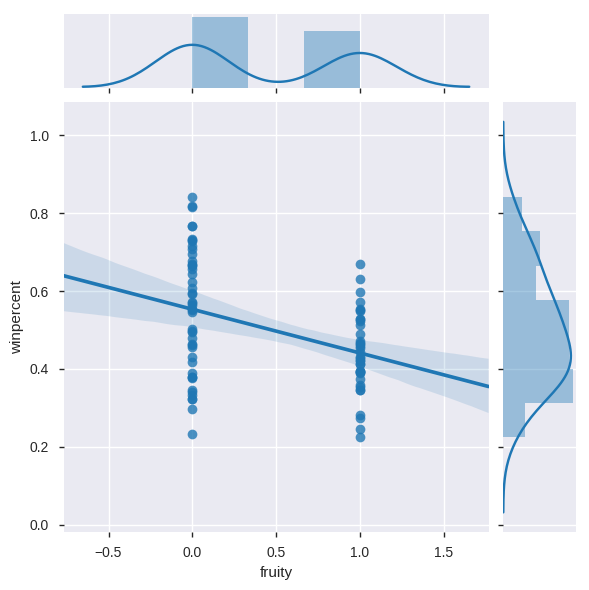

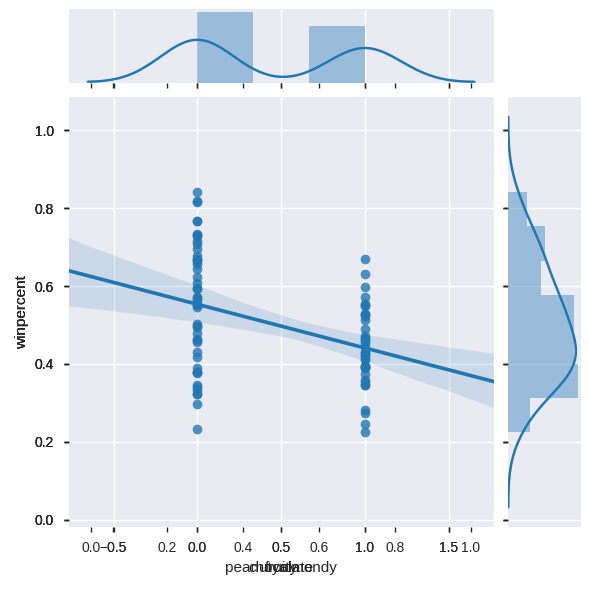

In [154]:
# chocolate	fruity	caramel	peanutyalmondy
JG1 = sns.jointplot("chocolate", "winpercent", data=df, kind='reg')
JG2 = sns.jointplot("peanutyalmondy", "winpercent", data=df, kind='reg')
JG3 = sns.jointplot("fruity", "winpercent", data=df, kind='reg')

#subplots migration
f = plt.figure()
for J in [JG1, JG2,JG3]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)

**Observation :**
winpercent and fruity is not  highly correlaed 
**winpercent** and **chocolate** is  **highly** **correlated**.

### Visualising Pairwise correlation

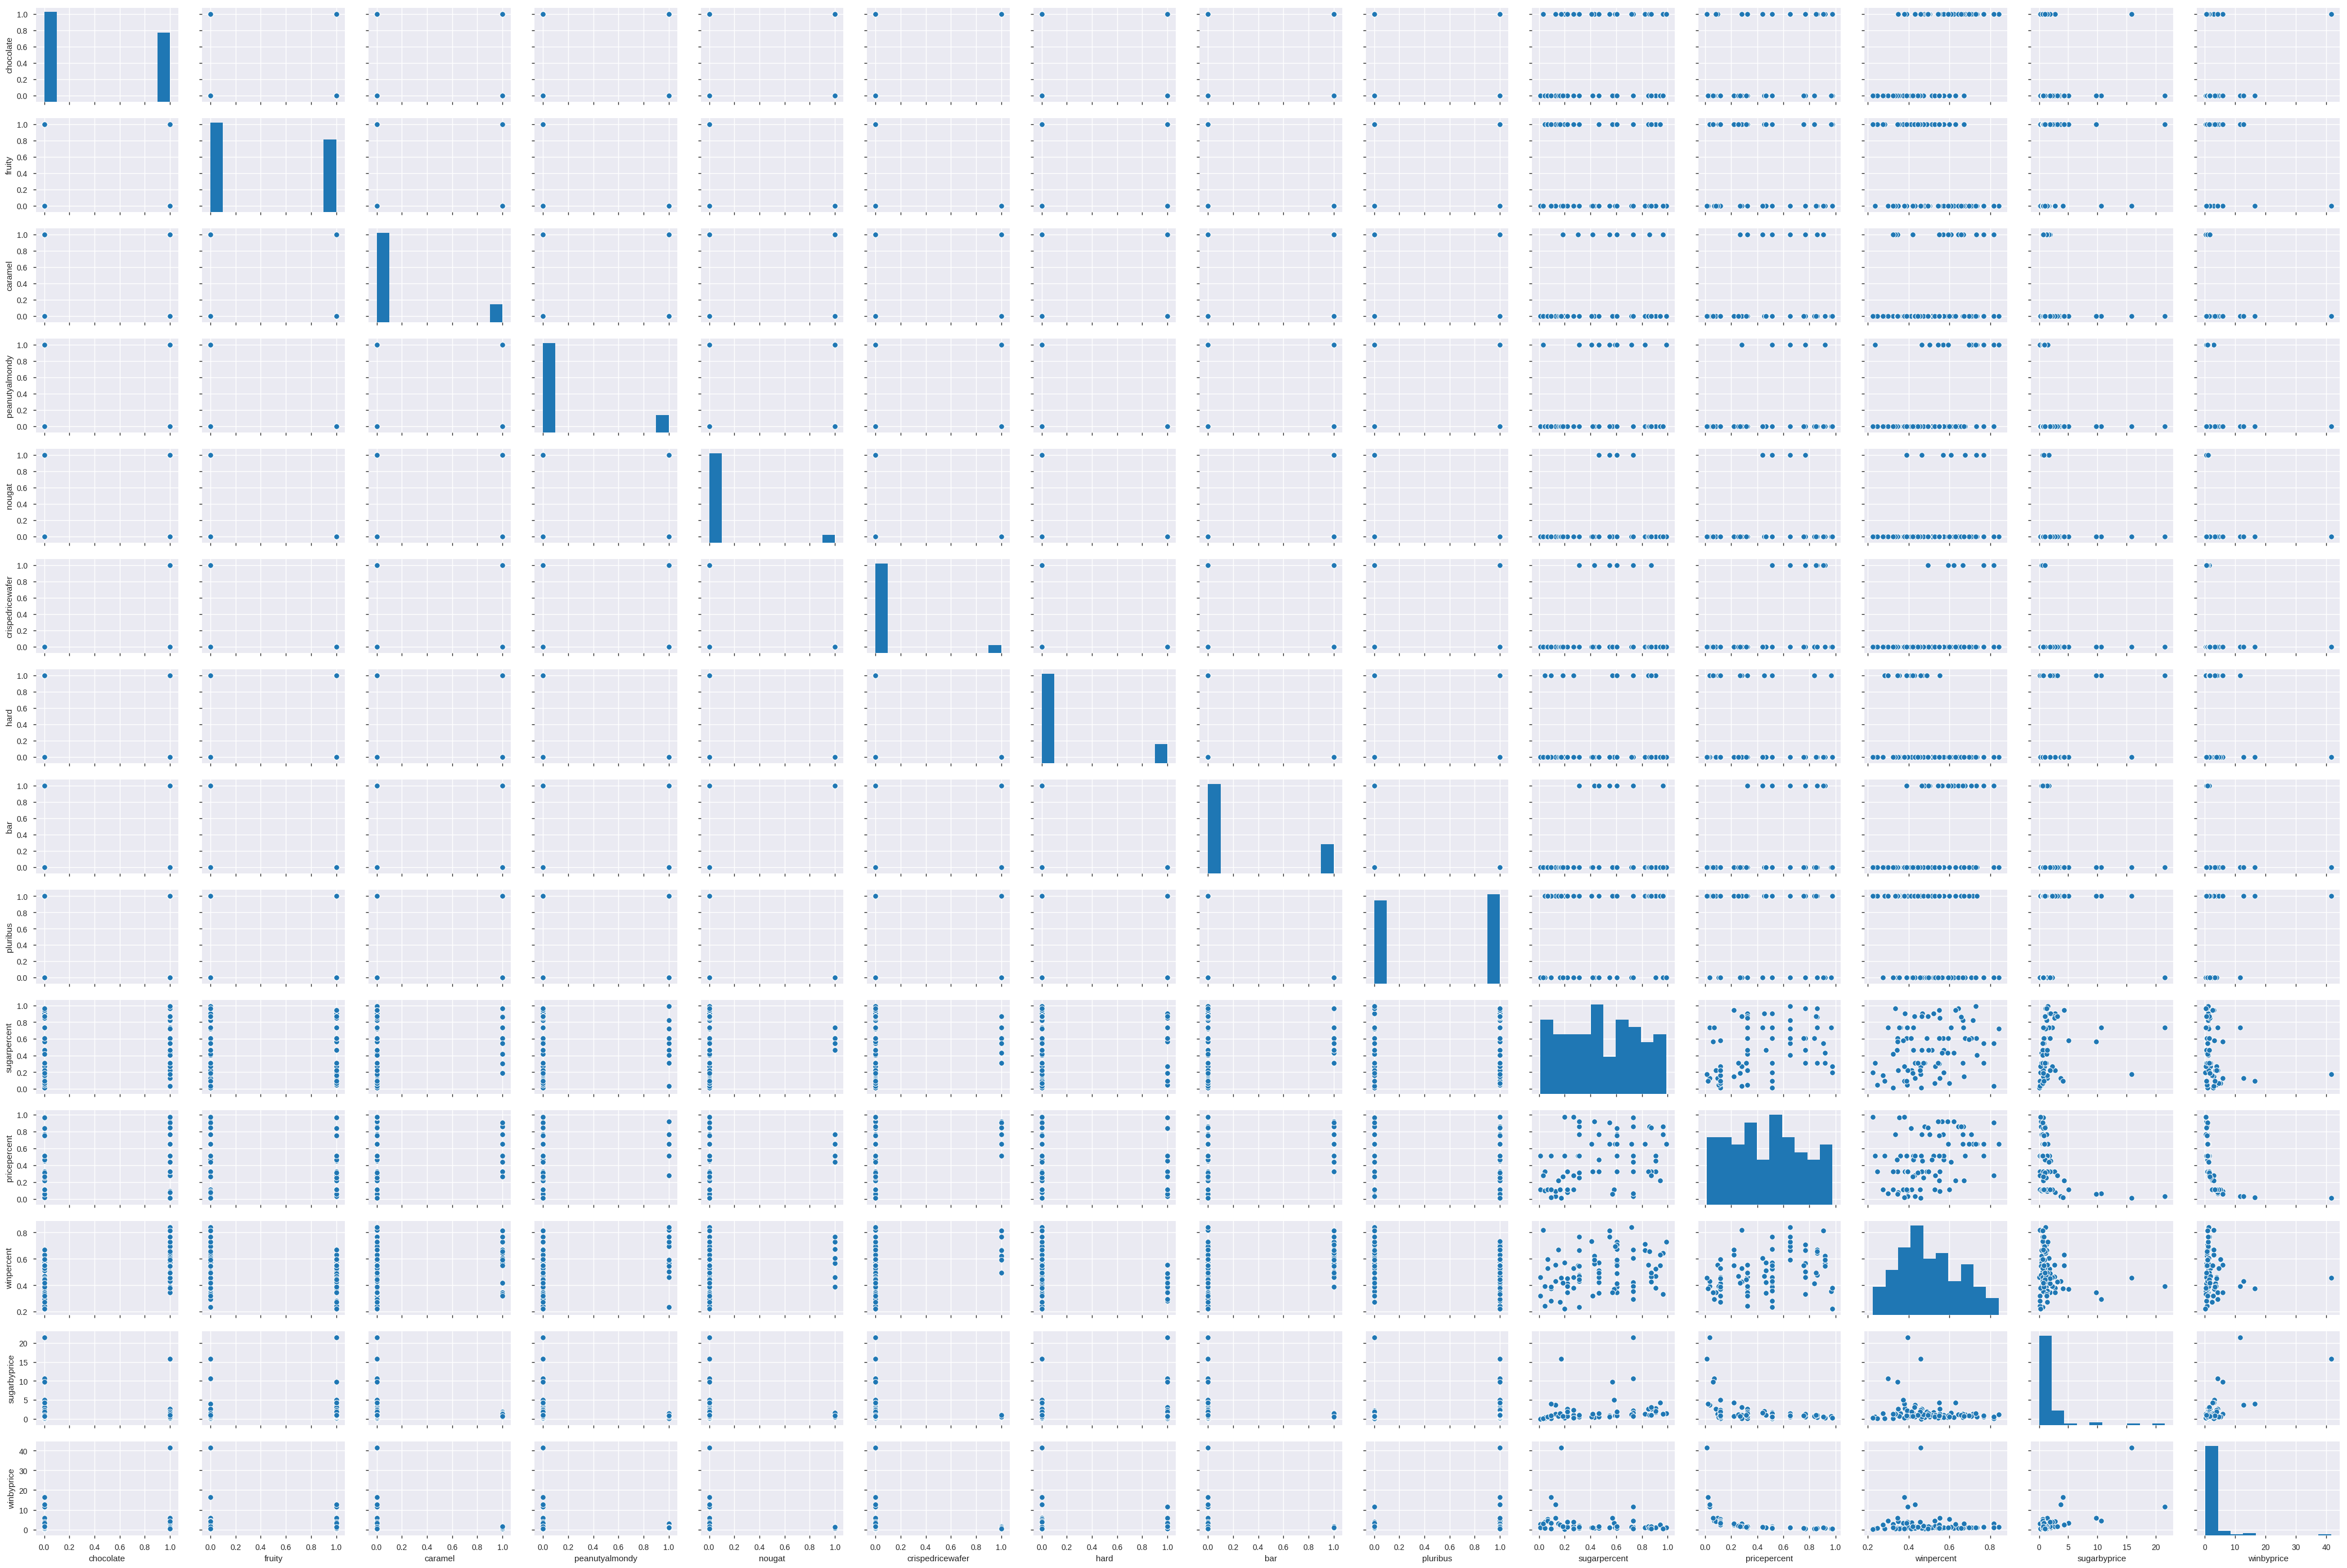

In [155]:
sns.pairplot(df, size = 2, aspect = 1.5)

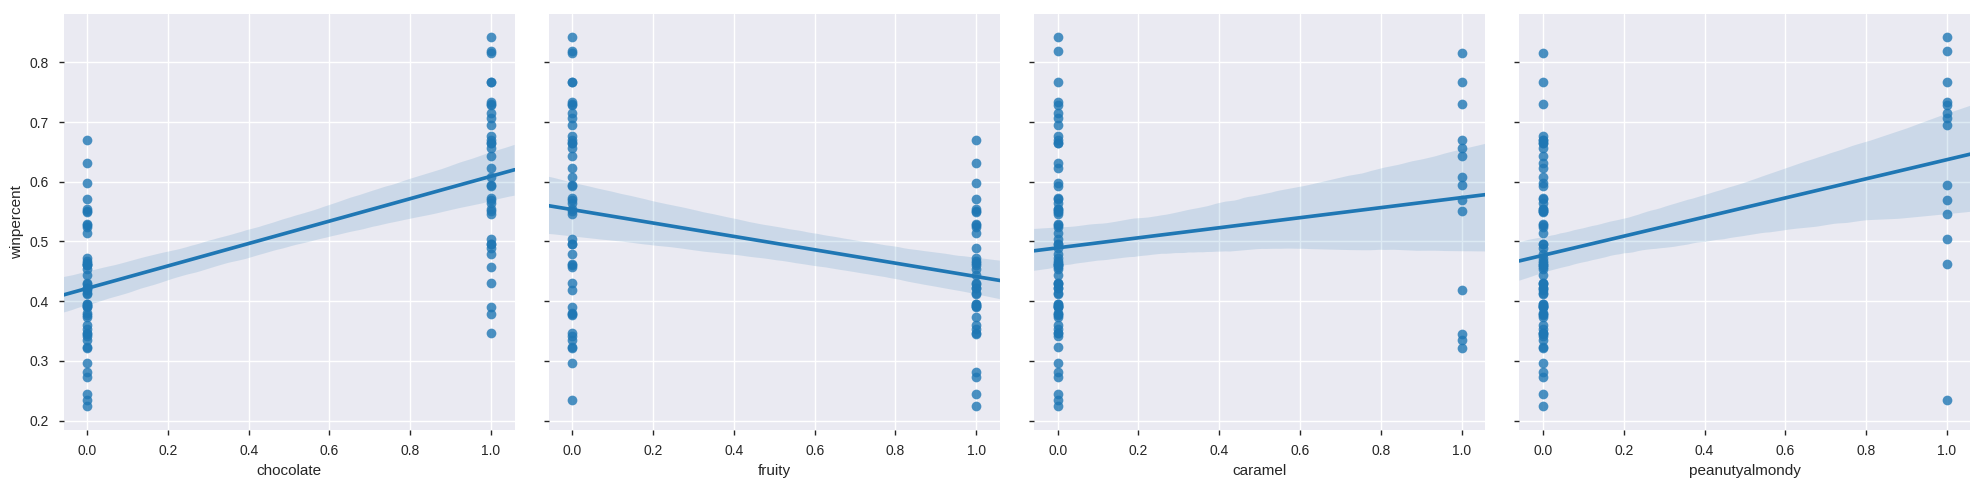

In [156]:
sns.pairplot(df, x_vars=['chocolate','fruity','caramel','peanutyalmondy'], y_vars='winpercent', size=5, aspect=1, kind='reg')

**Observation**

- Strong relationship between chocolate and winpercent
- Weak relationship between fruity and winpercent
- Peanultyalmony is having more relationship as compared with caramel and fruity 


##  Why Linear Regression

__Linear regression__ is a _basic_ and _commonly_ used type of __predictive analysis__.  The overall idea of regression is to examine two things: 
- Does a set of __predictor variables__ do a good job in predicting an __outcome__ (dependent) variable?  
- Which variables in particular are __significant predictors__ of the outcome variable, and in what way they do __impact__ the outcome variable?  

These regression estimates are used to explain the __relationship between one dependent variable and one or more independent variables__.  The simplest form of the regression equation with one dependent and one independent variable is defined by the formula :<br/>
$y = \beta_0 + \beta_1x$
- __Standardization__. <br/>
Standardize features by removing the _mean_ and scaling to _unit standard deviation_.

In [0]:
#Let’s get rid of the variable "competitorname" 
df_new = df.drop(['competitorname'], axis= 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_new)
data1 = scaler.transform(df_new)


In [174]:
data = pd.DataFrame(data1)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.14,-0.90,2.25,-0.44,-0.30,3.34,-0.46,1.75,-1.04,0.90,1.38,1.14,-0.33,-0.34
1,1.14,-0.90,-0.44,-0.44,3.34,-0.30,-0.46,1.75,-1.04,0.45,0.15,1.18,-0.22,-0.24
2,-0.88,-0.90,-0.44,-0.44,-0.30,-0.30,-0.46,-0.57,-1.04,-1.66,-1.24,-1.23,-0.57,0.06
3,-0.88,-0.90,-0.44,-0.44,-0.30,-0.30,-0.46,-0.57,-1.04,-1.66,0.15,-0.29,-0.59,-0.32
4,-0.88,1.11,-0.44,-0.44,-0.30,-0.30,-0.46,-0.57,-1.04,1.52,0.15,0.14,-0.03,-0.30


In [175]:
data.columns = ["chocolate","fruity","caramel","peanutyalmondy","nougat","crispedricewafer","hard","bar","pluribus","sugarpercent","pricepercent","winpercent","sugarbyprice","winbyprice"]
data.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
0,1.14,-0.90,2.25,-0.44,-0.30,3.34,-0.46,1.75,-1.04,0.90,1.38,1.14,-0.33,-0.34
1,1.14,-0.90,-0.44,-0.44,3.34,-0.30,-0.46,1.75,-1.04,0.45,0.15,1.18,-0.22,-0.24
2,-0.88,-0.90,-0.44,-0.44,-0.30,-0.30,-0.46,-0.57,-1.04,-1.66,-1.24,-1.23,-0.57,0.06
3,-0.88,-0.90,-0.44,-0.44,-0.30,-0.30,-0.46,-0.57,-1.04,-1.66,0.15,-0.29,-0.59,-0.32
4,-0.88,1.11,-0.44,-0.44,-0.30,-0.30,-0.46,-0.57,-1.04,1.52,0.15,0.14,-0.03,-0.30


In [0]:
# create a Python list of feature names
feature_cols = ['chocolate','fruity','caramel','peanutyalmondy','sugarpercent','pricepercent','winpercent','sugarbyprice', 'winbyprice']                

# use the list to select a subset of the original DataFrame-+
X = data[feature_cols]                                    

In [177]:
print(type(X)) 
print(X.shape) #Checking the type and shape of X.

<class 'pandas.core.frame.DataFrame'>
(85, 9)


In [178]:
X.head()

,chocolate,fruity,caramel,peanutyalmondy,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
0,1.14,-0.90,2.25,-0.44,0.90,1.38,1.14,-0.33,-0.34
1,1.14,-0.90,-0.44,-0.44,0.45,0.15,1.18,-0.22,-0.24
2,-0.88,-0.90,-0.44,-0.44,-1.66,-1.24,-1.23,-0.57,0.06
3,-0.88,-0.90,-0.44,-0.44,-1.66,0.15,-0.29,-0.59,-0.32
4,-0.88,1.11,-0.44,-0.44,1.52,0.15,0.14,-0.03,-0.30


In [179]:
y = data.winpercent
y.head()

0    1.14
1    1.18
2   -1.23
3   -0.29
4    0.14
Name: winpercent, dtype: float64

In [180]:
print(type(y))
print(y.shape) #Check the type and shape of y

<class 'pandas.core.series.Series'>
(85,)


**Splitting X and y into training and test datasets.**

In [181]:
#use model_selection instead cross_validation
from sklearn.model_selection import train_test_split  

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (68, 9)
y_train shape:  (68,)

Test cases as below
X_test shape:  (17, 9)
y_test shape:  (17,)


In [0]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True)
        linreg.fit(X_train, y_train)   # fit the model to the training data (learn the coefficients)                                                    
    
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(X_test)                # make predictions on the testing set

        RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))    # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg

## Linear regression in scikit-learn
To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating Root mean square error 
The code block given below shows how these steps are carried out:<br/>

``` from sklearn.linear_model import LinearRegression

    linreg = LinearRegression()
    
    linreg.fit(X_train, y_train) 
    
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))```

### Linear Regression Model without GridSearchCV


In [0]:
X = data[feature_cols]  
y = data.winbyprice
linreg = linear_reg(X,y)

In [184]:
#Interpreting Model Coefficients
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_) 

Intercept: 2.42861286636753e-17
Coefficients: [ 4.68628041e-17 -4.23272528e-16  1.43114687e-16 -1.45716772e-16
  4.77048956e-17 -5.20417043e-17  4.16333634e-17 -1.17961196e-16
  1.00000000e+00]


Its hard to remember the order of the feature names, we so we are __zipping__ the features to pair the feature names with the coefficients

In [0]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_)       

In [186]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 2.42861286636753e-17
chocolate 4.686280413131546e-17
fruity -4.2327252813834093e-16
caramel 1.4311468676808659e-16
peanutyalmondy -1.457167719820518e-16
sugarpercent 4.7704895589362195e-17
pricepercent -5.204170427930421e-17
winpercent 4.163336342344337e-17
sugarbyprice -1.1796119636642288e-16
winbyprice 1.0000000000000004


<hr>

### Linear Regression Model with GridSearchCV

In [189]:
#Let’s get rid of the variable "competitorname" 
df_new = df.drop(['competitorname'], axis= 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_new)
data1 = scaler.transform(df_new)
data = pd.DataFrame(data1)
data.head()
data.columns = ["chocolate","fruity","caramel","peanutyalmondy","nougat","crispedricewafer","hard","bar","pluribus","sugarpercent","pricepercent","winpercent","sugarbyprice","winbyprice"]
data.head()
# create a Python list of feature names
feature_cols = ['chocolate','fruity','caramel','peanutyalmondy','sugarpercent','pricepercent','winpercent','sugarbyprice', 'winbyprice']                

# use the list to select a subset of the original DataFrame-+
X = data[feature_cols]
# create a Python list of feature names
feature_cols = ['chocolate','fruity','caramel','peanutyalmondy','sugarpercent','pricepercent','winpercent','sugarbyprice', 'winbyprice']                

# use the list to select a subset of the original DataFrame-+
X = data[feature_cols] 
#Checking the type and shape of X.
print("Check the type and shape of X:")
print(type(X)) 
print(X.shape) 
X.head()
y = data.winpercent
y.head()

#Check the type and shape of y
print("Check the type and shape of y:")
print(type(y))
print(y.shape) 
#use model_selection instead cross_validation
from sklearn.model_selection import train_test_split  

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True)
        linreg.fit(X_train, y_train)   # fit the model to the training data (learn the coefficients)                                                    
    
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(X_test)                # make predictions on the testing set

        RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))    # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg
  
linreg = linear_reg(X,y,gridsearch=True)


Check the type and shape of X:
<class 'pandas.core.frame.DataFrame'>
(85, 9)
Check the type and shape of y:
<class 'pandas.core.series.Series'>
(85,)
Train cases as below
X_train shape:  (68, 9)
y_train shape:  (68,)

Test cases as below
X_test shape:  (17, 9)
y_test shape:  (17,)
Mean cross-validated score of the best_estimator :  1.0
RMSE for the test set is 8.746894067426454e-31
